1. Get the data source- it should contain same format picture image(I have updated manually but can be done easily by code.)
2. Print one of the picture to get the idea
3. Use CNN to convert image to features
4.Find the similarity between the images
5. Show the recommended images

Get the data source- it should contain same format picture image
a. You can get the data from https://statso.io/fashion-recommendations-using-image-features-case-study/
b. use matplotlib to show the image in the terminal
c. Create image path list  using glob

In [29]:
import os
extraction_directory_uploaded = os.path.join( os.getcwd(),"women fashion")
extracted_files_updated = os.listdir(extraction_directory_uploaded)
print(extracted_files_updated[:10])

['short, white, sleeveless dress with thin straps.jpg', 'deep burgundy, silky dress with long sleeves and a wrap-style front.jpg', 'long, intricately designed dress with full sleeves.jpg', 'beige top adorned with black dots and a green skirt.jpg', 'form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg', 'black top, white trousers.jpg', 'ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg', 'metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg', 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'sparkling blue dress.jpeg']


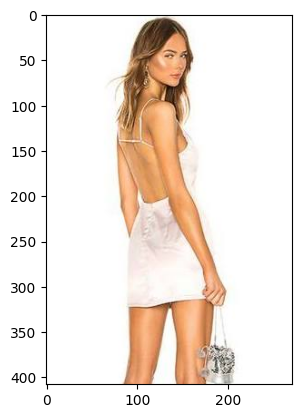

In [30]:
from PIL import Image
import matplotlib.pyplot as plt
def display_image(image_path):
    image= Image.open(image_path)
    plt.imshow(image)
    plt.show()

image_path = os.path.join(extraction_directory_uploaded,extracted_files_updated[0])
display_image(image_path)


Use CNN to convert image to features
a. use VGG16 base model for training the data
b.preprocess the image in the form of pixel array
c.extract feature using the model build
d. map these features with the image path in the image path list

In [35]:
from keras.preprocessing import image
from keras.applications.vgg16 import  VGG16, preprocess_input
from keras.models import Model
from PIL import UnidentifiedImageError
import numpy as np
base_model  = VGG16(weights="imagenet",include_top=False)
model = Model(inputs = base_model.input, outputs= base_model.output)

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)
    

    


def extract_features(prepocessed_image):
    features = model.predict(prepocessed_image)
    flattened_features = features.flatten()
    normalized_features = flattened_features/np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []
for image_path in extracted_files_updated:
    try:
        path = os.path.join(extraction_directory_uploaded,image_path)
        preprocessed_image = preprocess_image(path)
        features = extract_features(preprocessed_image)
        print(image_path)
        all_features.append(features)
        all_image_names.append(os.path.basename(image_path))
    except UnidentifiedImageError:
        print(f"Cannot identify image file: {image_path}")
        continue

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        continue


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
short, white, sleeveless dress with thin straps.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
deep burgundy, silky dress with long sleeves and a wrap-style front.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
long, intricately designed dress with full sleeves.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
beige top adorned with black dots and a green skirt.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
black top, white trousers.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
ark green, knee-length dress with short sleeves and a white, patterned neckline.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
metallic-looking jacket with intricate designs and fringes hanging from the sleeves.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
sparkling blue dress

Find the similarity between the images
a. Find the similarities between the features using cosine similarity score
b. Filter out the input  image index  from similar_indices
c. Display input image
d. Display similar image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


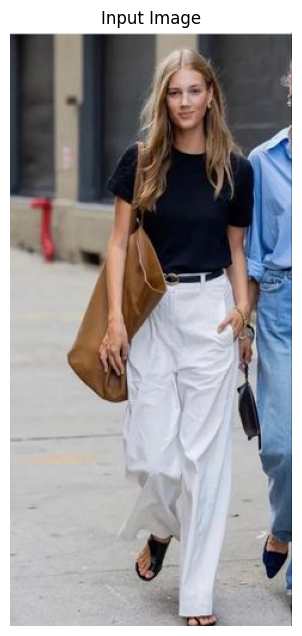

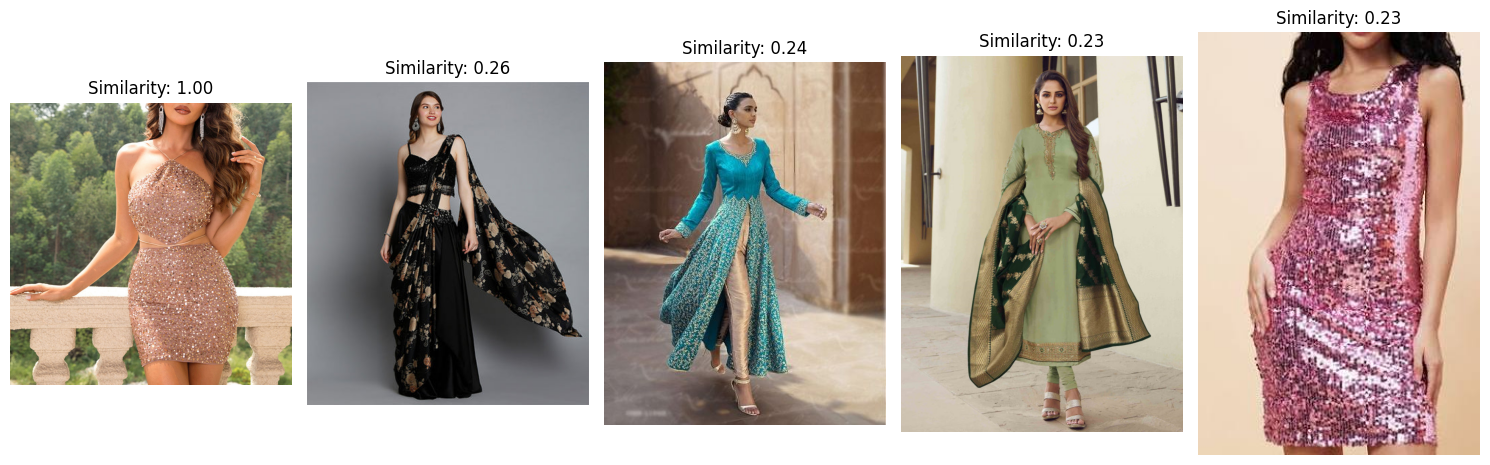

In [40]:
from scipy.spatial.distance import cosine
def recommend_same_item(image_path, top_n=5):
    preprocessed_image = preprocess_image(image_path)
    input_features = extract_features(preprocessed_image)
    similarities = [1-cosine(input_features,features) for features in all_features]
    similar_indices = np.argsort(similarities)[::-1]
    similar_image_names = [all_image_names[i] for i in similar_indices]
    plt.figure(figsize=(15,10))
    plt.subplot(1,top_n,1)
    plt.imshow(Image.open(image_path))
    plt.title("Input Image")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15,10))
    for i,idx in enumerate(similar_indices[:top_n]):
        plt.subplot(1,top_n,i+1)
        plt.imshow(Image.open(os.path.join(extraction_directory_uploaded,similar_image_names[idx])))
        plt.title(f"Similarity: {similarities[idx]:.2f}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
image_path = os.path.join(extraction_directory_uploaded,extracted_files_updated[5])
recommend_same_item(image_path)